#Librerias

In [1]:
#!pip install pysqlite3

In [2]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive
from google.colab import files
import os
import sys

# Conectar con google drive


In [3]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [4]:
#drive.flush_and_unmount()  #Linea en caso de tener que desconectar el drive por algún tipo de falla
drive.mount('/content/drive') #Linea para conectar al drive

Mounted at /content/drive


In [5]:
path="/content/drive/MyDrive/analitica 3/sistemas_recomendacion" ### ruta del repositorio en drive
os.chdir(path) ### volver la carpeta del repositorio directorio de trabajo
sys.path.append(path) ### agregarla al path, poder leer archivos de funciones propios como paquetes

In [6]:
import funciones as fn

# Carga de bases de datos

In [7]:
conn=sql.connect('/content/drive/MyDrive/analitica 3/sistemas_recomendacion/data/db_movies2')
cur=conn.cursor()

In [8]:
#Creación de cursor para  ejecutar consultas en la base de datos
#Visualizar las tablas contenidas en la base de datos
cur.execute("SELECT name FROM sqlite_master where type='table'")
cur.fetchall()

[('ratings',),
 ('movies',),
 ('ratings_sel',),
 ('movies_sel',),
 ('ratings_final',),
 ('movies_final',),
 ('df_final',),
 ('movies2',),
 ('ratings2',)]

## Carga de tablas en variables

In [9]:
cur.execute("SELECT * from movies")
cur.fetchall()

[(1, 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy'),
 (2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'),
 (3, 'Grumpier Old Men (1995)', 'Comedy|Romance'),
 (4, 'Waiting to Exhale (1995)', 'Comedy|Drama|Romance'),
 (5, 'Father of the Bride Part II (1995)', 'Comedy'),
 (6, 'Heat (1995)', 'Action|Crime|Thriller'),
 (7, 'Sabrina (1995)', 'Comedy|Romance'),
 (8, 'Tom and Huck (1995)', 'Adventure|Children'),
 (9, 'Sudden Death (1995)', 'Action'),
 (10, 'GoldenEye (1995)', 'Action|Adventure|Thriller'),
 (11, 'American President, The (1995)', 'Comedy|Drama|Romance'),
 (12, 'Dracula: Dead and Loving It (1995)', 'Comedy|Horror'),
 (13, 'Balto (1995)', 'Adventure|Animation|Children'),
 (14, 'Nixon (1995)', 'Drama'),
 (15, 'Cutthroat Island (1995)', 'Action|Adventure|Romance'),
 (16, 'Casino (1995)', 'Crime|Drama'),
 (17, 'Sense and Sensibility (1995)', 'Drama|Romance'),
 (18, 'Four Rooms (1995)', 'Comedy'),
 (19, 'Ace Ventura: When Nature Calls (1995)', 'Comedy'),
 (20, 'Mo

In [10]:
cur.execute("SELECT * from ratings")
cur.fetchall()

[(1, 1, 4.0, 964982703),
 (1, 3, 4.0, 964981247),
 (1, 6, 4.0, 964982224),
 (1, 47, 5.0, 964983815),
 (1, 50, 5.0, 964982931),
 (1, 70, 3.0, 964982400),
 (1, 101, 5.0, 964980868),
 (1, 110, 4.0, 964982176),
 (1, 151, 5.0, 964984041),
 (1, 157, 5.0, 964984100),
 (1, 163, 5.0, 964983650),
 (1, 216, 5.0, 964981208),
 (1, 223, 3.0, 964980985),
 (1, 231, 5.0, 964981179),
 (1, 235, 4.0, 964980908),
 (1, 260, 5.0, 964981680),
 (1, 296, 3.0, 964982967),
 (1, 316, 3.0, 964982310),
 (1, 333, 5.0, 964981179),
 (1, 349, 4.0, 964982563),
 (1, 356, 4.0, 964980962),
 (1, 362, 5.0, 964982588),
 (1, 367, 4.0, 964981710),
 (1, 423, 3.0, 964982363),
 (1, 441, 4.0, 964980868),
 (1, 457, 5.0, 964981909),
 (1, 480, 4.0, 964982346),
 (1, 500, 3.0, 964981208),
 (1, 527, 5.0, 964984002),
 (1, 543, 4.0, 964981179),
 (1, 552, 4.0, 964982653),
 (1, 553, 5.0, 964984153),
 (1, 590, 4.0, 964982546),
 (1, 592, 4.0, 964982271),
 (1, 593, 4.0, 964983793),
 (1, 596, 5.0, 964982838),
 (1, 608, 5.0, 964982931),
 (1, 648, 

# Exploración de datos

## Tablas movies (df_movies)

In [11]:
#Visualización de la estructura de los datos movies en tabla
print("\nPrimeras 5 filas:")
df_movies=pd.read_sql("SELECT * from movies",conn)
df_movies.head()


Primeras 5 filas:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
# Algunos datos a conocer de la tabla ratings
fn.explorar_dataframe(df_movies, "Movies")

# Algunos datos a conocer de la tabla Movies
Dimensiones: 9742 filas y 3 columnas
**************************************************

Descripción de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
**************************************************

Estadísticas descriptivas:
              movieId        title genres
count     9742.000000         9742   9742
unique            NaN         9737    951
top               NaN  Emma (1996)  Drama
freq              NaN            2   1053
mean     42200.353623          NaN    NaN
std      52160.494854          NaN    NaN
min          1.000000          NaN    NaN
25%       3248.250000          NaN    NaN
50%       7300.000000          NaN 

In [13]:
##Cuantas peliculas hay por cada género
df_genres=pd.read_sql("""SELECT genres as genero,
                COUNT(*) as conteo
                FROM movies
                GROUP BY genres""",conn)
df_genres

,genero,conteo
0,(no genres listed),34
1,Action,60
2,Action|Adventure,32
3,Action|Adventure|Animation,18
4,Action|Adventure|Animation|Children,6
...,...,...
946,Sci-Fi|Thriller,23
947,Sci-Fi|Thriller|IMAX,1
948,Thriller,84
949,War,4


In [14]:
#Como se observa los generos estan mezclados en una misma columna por lo tanto es necesario dividirlos para tener una frecuencia correcta de cada uno
# Creamos un contador
conteo_generos = Counter()

# Iteramos sobre cada fila
for _, fila in df_genres.iterrows():
    generos = fila['genero'].split('|')
    for genero in generos:
        conteo_generos[genero] += fila['conteo']

# Lo convertimos en un df ordenado
df_resultado = pd.DataFrame(conteo_generos.items(), columns=["genero", "cantidad"])
df_resultado = df_resultado.sort_values(by="cantidad", ascending=False).reset_index(drop=True)
df_resultado

,genero,cantidad
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


In [15]:
print("Número de géneros únicos:", df_resultado['genero'].nunique())

Número de géneros únicos: 20


In [16]:
# Grafica de cantidad peliculas por cada genero
data  = go.Bar( x=df_resultado.genero,y=df_resultado.cantidad, text=df_resultado.cantidad, textposition="outside")
Layout=go.Layout(title="Cantidad de peliculas por cada género",xaxis={'title':'Generos'},yaxis={'title':'Cantidad'})
go.Figure(data,Layout)

In [17]:
#Separación de generos en base de datos original
df_movies['genres'] = df_movies['genres'].str.split('|')
df_movies2 = df_movies.explode('genres').reset_index(drop=True)
df_movies2

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
22079,193583,No Game No Life: Zero (2017),Fantasy
22080,193585,Flint (2017),Drama
22081,193587,Bungo Stray Dogs: Dead Apple (2018),Action
22082,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [18]:
## Análisis de los años de las películas
# Peliculas sin año de identificacion y rango de años
df_movies2['year_movies'] = df_movies2['title'].str.extract(r'\((\d{4})\)').astype('float') # Vamos a agregar una nueva columna con el año a df_movies
print(f"Rango de años: {df_movies2['year_movies'].min():.0f} - {df_movies2['year_movies'].max():.0f}")
print(f"Películas sin año identificado: {df_movies2['year_movies'].isna().sum()}")

Rango de años: 1902 - 2018
Películas sin año identificado: 16


In [19]:
##Cuantas peliculas hay por cada año
year_counts = df_movies2['year_movies'].value_counts().sort_index()
year_counts

,count
year_movies,
1902.0,4
1903.0,2
1908.0,3
1915.0,2
1916.0,7
...,...
2014.0,631
2015.0,598
2016.0,436


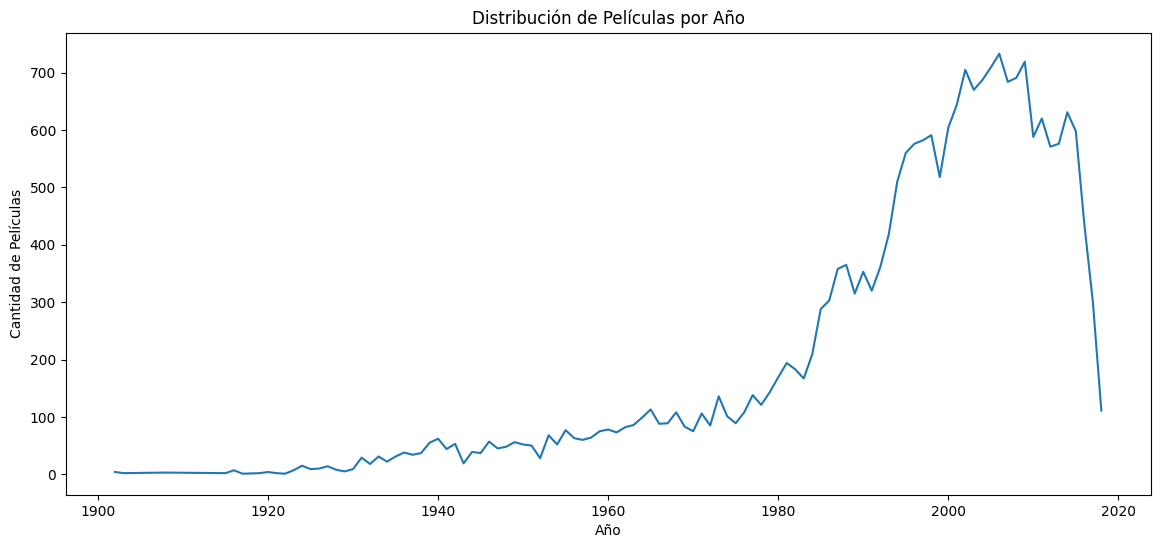

In [20]:
# Gráfica de distribución de películas por cada año
plt.figure(figsize=(14, 6))
year_counts.plot(kind='line')
plt.title('Distribución de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.show()

In [21]:
 #Vamos a guardar esta nueva tabla en la base de datos como movies2 de tal forma que ya tengamos una columna aparte con el año que puede ser útil
df_movies2.to_sql('movies2', conn, if_exists='replace', index=False)

22084

In [22]:
## Verificación de que quedara guardada
cur.execute("SELECT name FROM sqlite_master where type='table'")
cur.fetchall()

[('ratings',),
 ('movies',),
 ('ratings_sel',),
 ('movies_sel',),
 ('ratings_final',),
 ('movies_final',),
 ('df_final',),
 ('ratings2',),
 ('movies2',)]

## Tabla rating (df_ratings)

In [23]:
#Visualización de la estructura de los datos rating en tabla
print("\nPrimeras 5 filas:")
df_ratings=pd.read_sql("SELECT * from ratings",conn)
df_ratings.head()


Primeras 5 filas:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
# Algunos datos a conocer de la tabla ratings
fn.explorar_dataframe(df_ratings, "Ratings")

# Algunos datos a conocer de la tabla Ratings
Dimensiones: 100836 filas y 4 columnas
**************************************************

Descripción de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
**************************************************

Estadísticas descriptivas:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000  

In [25]:
# Convertir timestamp a datetime para mejor análisis
df_ratings['date'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_ratings['year_ratings'] = df_ratings['date'].dt.year
df_ratings['month'] = df_ratings['date'].dt.month
df_ratings['day'] = df_ratings['date'].dt.day
df_ratings

,userId,movieId,rating,timestamp,date,year_ratings,month,day
0,1,1,4.0,964982703,2000-07-30 18:45:03,2000,7,30
1,1,3,4.0,964981247,2000-07-30 18:20:47,2000,7,30
2,1,6,4.0,964982224,2000-07-30 18:37:04,2000,7,30
3,1,47,5.0,964983815,2000-07-30 19:03:35,2000,7,30
4,1,50,5.0,964982931,2000-07-30 18:48:51,2000,7,30
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017-05-03 21:53:22,2017,5,3
100832,610,168248,5.0,1493850091,2017-05-03 22:21:31,2017,5,3
100833,610,168250,5.0,1494273047,2017-05-08 19:50:47,2017,5,8
100834,610,168252,5.0,1493846352,2017-05-03 21:19:12,2017,5,3


In [26]:
# Análisis de los ratings
rating_counts=pd.read_sql("""SELECT rating, COUNT(*) AS count
FROM ratings
GROUP BY rating
ORDER BY rating""", conn)
rating_counts

,rating,count
0,0.5,1370
1,1.0,2811
2,1.5,1791
3,2.0,7551
4,2.5,5550
5,3.0,20047
6,3.5,13136
7,4.0,26818
8,4.5,8551
9,5.0,13211


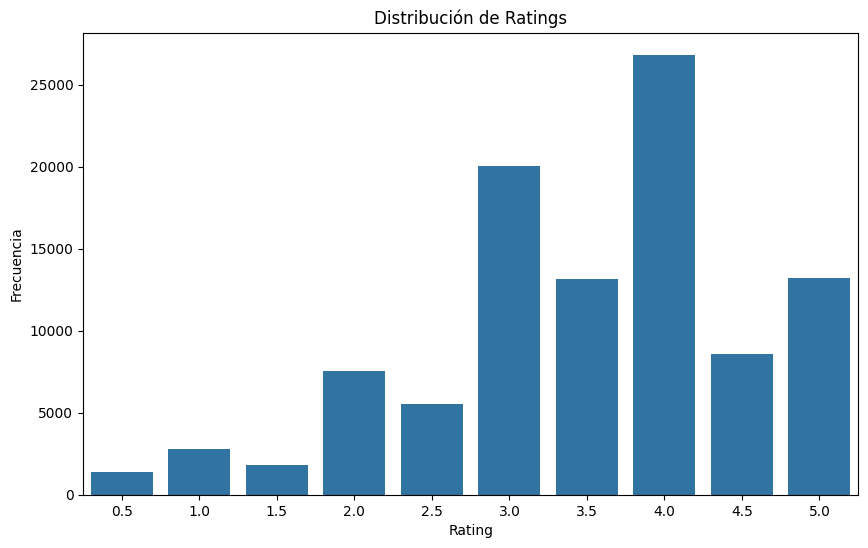

In [27]:
# Gráfica de distribución de ratings con los datos ya agrupados
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='count', data=rating_counts)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

In [28]:
# Distribución de actividad por usuario
user_activity_df = pd.read_sql("""
    SELECT userId, COUNT(*) AS num_ratings
    FROM ratings
    GROUP BY userId
""", conn)

# Se calculan las estadísticas
user_activity = user_activity_df['num_ratings']
print("\nEstadísticas de actividad por usuario:")
print(f"Mínimo de ratings por usuario: {user_activity.min()}")
print(f"Máximo de ratings por usuario: {user_activity.max()}")
print(f"Promedio de ratings por usuario: {user_activity.mean():.2f}")
print(f"Mediana de ratings por usuario: {user_activity.median()}")


Estadísticas de actividad por usuario:
Mínimo de ratings por usuario: 20
Máximo de ratings por usuario: 2698
Promedio de ratings por usuario: 165.30
Mediana de ratings por usuario: 70.5


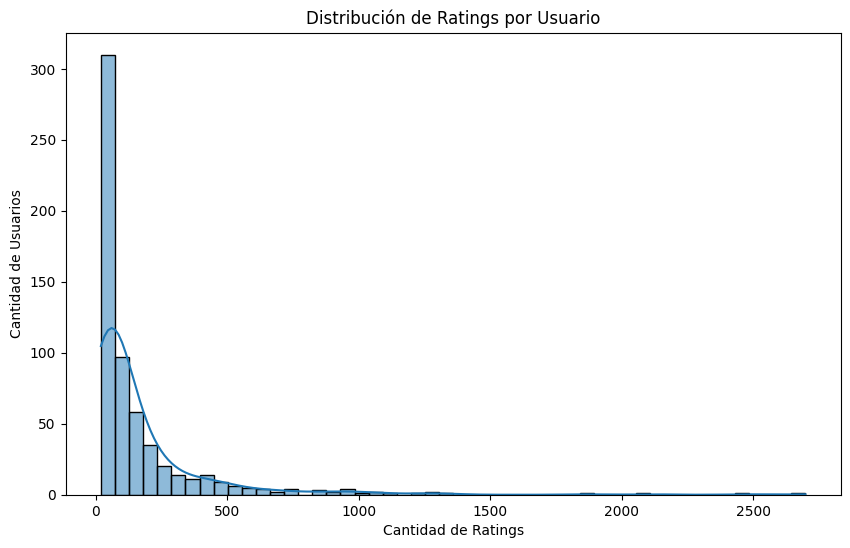

In [29]:
# Gráfica de actividad de usuarios
plt.figure(figsize=(10, 6))
sns.histplot(user_activity, bins=50, kde=True)
plt.title('Distribución de Ratings por Usuario')
plt.xlabel('Cantidad de Ratings')
plt.ylabel('Cantidad de Usuarios')
plt.show()

In [30]:
#distribucion de ratings por pelicula
movie_activity_df = pd.read_sql("""
    SELECT movieId, COUNT(*) AS num_ratings_movies
    FROM ratings
    GROUP BY movieId
""", conn)

# Se calculan las estadísticas
movie_activity = movie_activity_df['num_ratings_movies']
print("\nEstadísticas de actividad por pelicula:")
print(f"Mínimo de ratings por pelicula: {movie_activity.min()}")
print(f"Máximo de ratings por pelicula: {movie_activity.max()}")
print(f"Promedio de ratings por pelicula: {movie_activity.mean():.2f}")
print(f"Mediana de ratings por pelicula: {movie_activity.median()}")


Estadísticas de actividad por pelicula:
Mínimo de ratings por pelicula: 1
Máximo de ratings por pelicula: 329
Promedio de ratings por pelicula: 10.37
Mediana de ratings por pelicula: 3.0


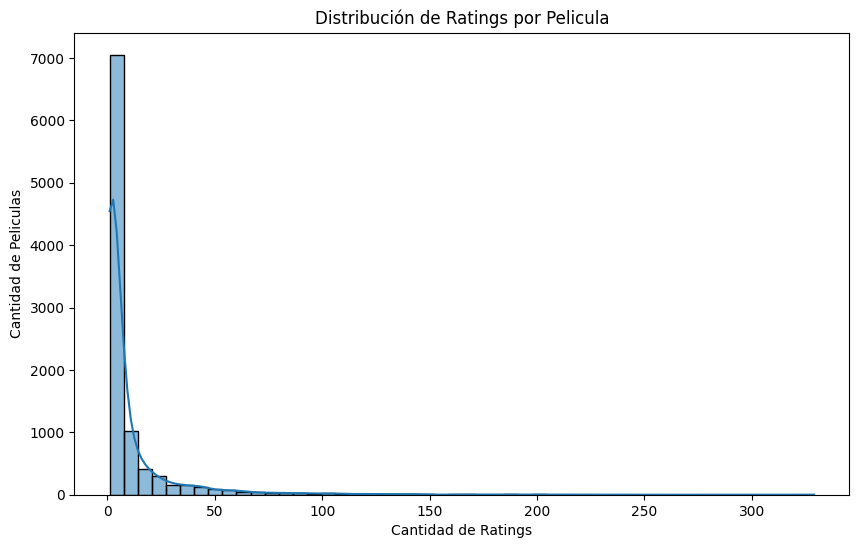

In [31]:
# Gráfica de actividad de peliculas
plt.figure(figsize=(10, 6))
sns.histplot(movie_activity, bins=50, kde=True)
plt.title('Distribución de Ratings por Pelicula')
plt.xlabel('Cantidad de Ratings')
plt.ylabel('Cantidad de Peliculas')
plt.show()

In [32]:
####Excluir peliculas que no tengan más de 10 calificaciones
rating_movies2=pd.read_sql("""SELECT movieId, COUNT(*) AS num_ratings_movies
    FROM ratings
    GROUP BY movieId
    HAVING num_ratings_movies >= 25
    ORDER BY num_ratings_movies DESC
""",conn )

# Se calculan las estadísticas
movie_activity2 = rating_movies2['num_ratings_movies']
print("\nEstadísticas de actividad por pelicula:")
print(f"Mínimo de ratings por pelicula: {movie_activity2.min()}")
print(f"Máximo de ratings por pelicula: {movie_activity2.max()}")
print(f"Promedio de ratings por pelicula: {movie_activity2.mean():.2f}")
print(f"Mediana de ratings por pelicula: {movie_activity2.median()}")


Estadísticas de actividad por pelicula:
Mínimo de ratings por pelicula: 25
Máximo de ratings por pelicula: 329
Promedio de ratings por pelicula: 59.54
Mediana de ratings por pelicula: 45.0


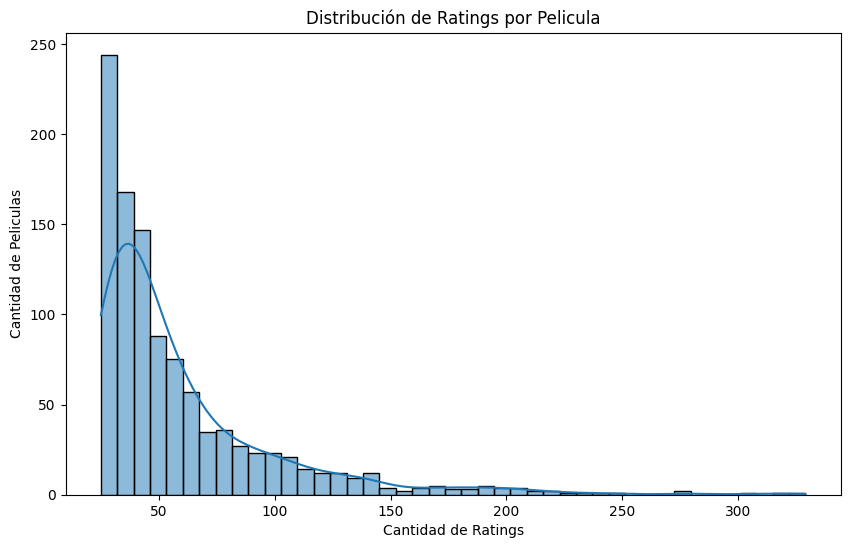

In [33]:
# Gráfica de actividad de peliculas
plt.figure(figsize=(10, 6))
sns.histplot(movie_activity2, kde=True)
plt.title('Distribución de Ratings por Pelicula')
plt.xlabel('Cantidad de Ratings')
plt.ylabel('Cantidad de Peliculas')
plt.show()

In [34]:
# Top películas con mas calificaciones (ratings)
movie_popularity = df_ratings['movieId'].value_counts().reset_index()
movie_popularity.columns = ['movieId', 'rating_count']
top_movies = pd.merge(movie_popularity, df_movies[['movieId', 'title']], on='movieId')
top_movies = top_movies.sort_values('rating_count', ascending=False).head(10)

print("\nTop 10 películas con más ratings:")
print(top_movies[['title', 'rating_count']])


Top 10 películas con más ratings:
                                       title  rating_count
0                        Forrest Gump (1994)           329
1           Shawshank Redemption, The (1994)           317
2                        Pulp Fiction (1994)           307
3           Silence of the Lambs, The (1991)           279
4                         Matrix, The (1999)           278
5  Star Wars: Episode IV - A New Hope (1977)           251
6                       Jurassic Park (1993)           238
7                          Braveheart (1995)           237
8          Terminator 2: Judgment Day (1991)           224
9                    Schindler's List (1993)           220


<ipython-input-35-05fe475c0a0e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




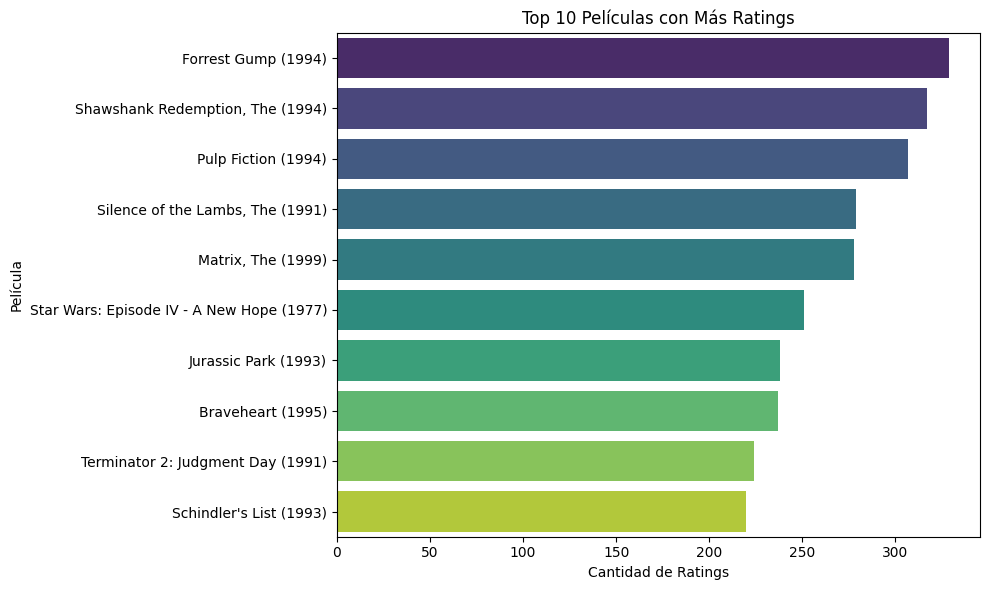

In [35]:
# Gráfica de películas más calificadas
plt.figure(figsize=(10, 6))
sns.barplot(data=top_movies, y='title', x='rating_count', palette='viridis')
plt.title('Top 10 Películas con Más Ratings')
plt.xlabel('Cantidad de Ratings')
plt.ylabel('Película')
plt.tight_layout()
plt.show()

In [36]:
# Promedio de ratings por película
avg_ratings = df_ratings.groupby('movieId')['rating'].mean().reset_index()
avg_ratings.columns = ['movieId', 'avg_rating']
avg_ratings = pd.merge(avg_ratings, df_movies[['movieId', 'title']], on='movieId')
avg_ratings = avg_ratings.sort_values('avg_rating', ascending=False)

print("\nTop 10 películas con mejor promedio de rating (mínimo 100 ratings):")
popular_movies = avg_ratings[avg_ratings['movieId'].isin(movie_popularity[movie_popularity['rating_count'] >= 100]['movieId'])]
print(popular_movies.head(10)[['title', 'avg_rating']])


Top 10 películas con mejor promedio de rating (mínimo 100 ratings):
                                 title  avg_rating
277   Shawshank Redemption, The (1994)    4.429022
659              Godfather, The (1972)    4.289062
2224                 Fight Club (1999)    4.272936
921     Godfather: Part II, The (1974)    4.259690
6298              Departed, The (2006)    4.252336
913                  Goodfellas (1990)    4.250000
694                  Casablanca (1942)    4.240000
6693           Dark Knight, The (2008)    4.238255
46          Usual Suspects, The (1995)    4.237745
898         Princess Bride, The (1987)    4.232394


In [37]:
# Películas sin ratings

print("RELACIÓN ENTRE TABLAS")
print("*" * 50)
print(f"Películas en tabla 'movies': {df_movies['movieId'].nunique()}")
print(f"Películas en tabla 'ratings': {df_ratings['movieId'].nunique()}")

movies_con_ratings = set(df_ratings['movieId'].unique())
movies_sin_ratings = df_movies[~df_movies['movieId'].isin(movies_con_ratings)]
print(f"Películas sin ratings: {len(movies_sin_ratings)}")

RELACIÓN ENTRE TABLAS
**************************************************
Películas en tabla 'movies': 9742
Películas en tabla 'ratings': 9724
Películas sin ratings: 18


In [38]:
#Peliculas sin ratings - Lista
print(movies_sin_ratings[['movieId', 'title']])

      movieId                                         title
816      1076                         Innocents, The (1961)
2211     2939                                Niagara (1953)
2499     3338                        For All Mankind (1989)
2587     3456  Color of Paradise, The (Rang-e khoda) (1999)
3118     4194                I Know Where I'm Going! (1945)
4037     5721                            Chosen, The (1981)
4506     6668   Road Home, The (Wo de fu qin mu qin) (1999)
4598     6849                                Scrooge (1970)
4704     7020                                  Proof (1991)
5020     7792                     Parallax View, The (1974)
5293     8765                      This Gun for Hire (1942)
5421    25855                  Roaring Twenties, The (1939)
5452    26085                   Mutiny on the Bounty (1962)
5749    30892            In the Realms of the Unreal (2004)
5824    32160                      Twentieth Century (1934)
5837    32371                     Call N

In [39]:
 #Vamos a guardar esta nueva tabla en la base de datos como ratings2 de tal forma que ya tengamos una columna aparte con la fecha completa, el año y el mes
 #Es decir tener timestamp organizado
df_ratings.to_sql('ratings2', conn, if_exists='replace', index=False)

100836

In [40]:
## Verificación de que quedara guardada
cur.execute("SELECT name FROM sqlite_master where type='table'")
cur.fetchall()

[('ratings',),
 ('movies',),
 ('ratings_sel',),
 ('movies_sel',),
 ('ratings_final',),
 ('movies_final',),
 ('df_final',),
 ('movies2',),
 ('ratings2',)]

#Resumen del análisis exploratorio

In [41]:
print("RESUMEN DEL ANÁLISIS EXPLORATORIO")
print("-" * 50)
print(f"1. Base de datos con {df_movies.shape[0]} películas y {df_ratings.shape[0]} ratings")
print(f"2. {df_ratings['userId'].nunique()} usuarios han calificado películas")
print(f"3. Rating promedio global: {df_ratings['rating'].mean():.2f}")
print("4. Variable de conexión entre tablas: movieId")
print("5. Variables numéricas: movieId, userId, rating, timestamp")
print("6. Variables categóricas: title, genres")
print("7. Variable temporal derivada: date (convertida de timestamp)")

RESUMEN DEL ANÁLISIS EXPLORATORIO
--------------------------------------------------
1. Base de datos con 9742 películas y 100836 ratings
2. 610 usuarios han calificado películas
3. Rating promedio global: 3.50
4. Variable de conexión entre tablas: movieId
5. Variables numéricas: movieId, userId, rating, timestamp
6. Variables categóricas: title, genres
7. Variable temporal derivada: date (convertida de timestamp)


In [43]:
df_1076=df_ratings[df_ratings['movieId']==2939]
df_1076

,userId,movieId,rating,timestamp,date,year_ratings,month,day


In [43]:
fn.ejecutar_sql('joins.sql',cur)
cur.execute("SELECT name FROM sqlite_master where type='table'")
cur.fetchall()

[('ratings',),
 ('movies',),
 ('movies2',),
 ('ratings2',),
 ('ratings_sel',),
 ('movies_sel',),
 ('ratings_final',),
 ('movies_final',),
 ('df_final',)]

In [46]:
df_final=pd.read_sql("SELECT * from df_final",conn)

In [50]:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760010 entries, 0 to 760009
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       760010 non-null  int64  
 1   movie_id      760010 non-null  int64  
 2   rating        760010 non-null  float64
 3   year_ratings  760010 non-null  int64  
 4   month         760010 non-null  int64  
 5   day           760010 non-null  int64  
 6   title         760010 non-null  object 
 7   genres        760010 non-null  object 
 8   year_movies   760010 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 52.2+ MB


,user_id,movie_id,rating,year_ratings,month,day,title,genres,year_movies
0,1,1,4.0,2000,7,30,Toy Story (1995),Adventure,1995.0
1,1,1,4.0,2000,7,30,Toy Story (1995),Adventure,1995.0
2,1,1,4.0,2000,7,30,Toy Story (1995),Adventure,1995.0
3,1,1,4.0,2000,7,30,Toy Story (1995),Adventure,1995.0
4,1,1,4.0,2000,7,30,Toy Story (1995),Adventure,1995.0


In [57]:
df_ratings=df_ratings[df_ratings['movieId']==2939]
df_ratings

,userId,movieId,rating,timestamp,date,year_ratings,month,day


In [54]:
movies_sin_ratings

,movieId,title,genres
816,1076,"Innocents, The (1961)","[Drama, Horror, Thriller]"
2211,2939,Niagara (1953),"[Drama, Thriller]"
2499,3338,For All Mankind (1989),[Documentary]
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",[Drama]
3118,4194,I Know Where I'm Going! (1945),"[Drama, Romance, War]"
4037,5721,"Chosen, The (1981)",[Drama]
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)","[Drama, Romance]"
4598,6849,Scrooge (1970),"[Drama, Fantasy, Musical]"
4704,7020,Proof (1991),"[Comedy, Drama, Romance]"
5020,7792,"Parallax View, The (1974)",[Thriller]


#Eliminación de datos a partir del analisis exploratorio

## Eliminar de df_final las peliculas que no tienen ratings

In [53]:
df_final = df_final[~df_final['movie_id'].isin(movies_sin_ratings['movieId'])]
df_final.info()
#Hay 7 peliculas que en su nombre no tenian el año asignado por lo tanto quedaron sin informacion en la columna 'year_movies'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760010 entries, 0 to 760009
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       760010 non-null  int64  
 1   movie_id      760010 non-null  int64  
 2   rating        760010 non-null  float64
 3   year_ratings  760010 non-null  int64  
 4   month         760010 non-null  int64  
 5   day           760010 non-null  int64  
 6   title         760010 non-null  object 
 7   genres        760010 non-null  object 
 8   year_movies   760010 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 52.2+ MB
